# IETF Attendance using `ietfdata` library and the Datatracker

We can produce similar graphs, more easily with more data and less code, using data stored in the IETF Datatracker and accessed using `ietfdata`.

In [143]:
from ietfdata.datatracker     import *
from ietfdata.datatracker_ext import *
import pandas as pd
import matplotlib.pyplot as plt
import dataclasses

In [144]:
datatracker = DataTracker()

meetings = datatracker.meetings(meeting_type = datatracker.meeting_type(MeetingTypeURI('/api/v1/name/meetingtypename/ietf/')))
full_ietf_meetings = list(meetings)

In [145]:
ietf_meetings = []
for meeting in full_ietf_meetings:
    meetingd = dataclasses.asdict(meeting)
    meetingd['meeting_obj'] = meeting
    meetingd['num'] = int(meeting.number)
    ietf_meetings.append(meetingd)    

In [146]:
meetings_df = pd.DataFrame.from_records(ietf_meetings)

One way to get the registration count for a meeting is to download every individual's meeting registration and count them. (We don't have to do this regularly, because the datatracker actually provides counts and I've confirmed they are the same. Commented out below because the operation can be slow and isn't necessary, but feel to uncomment and try it out!)

In [147]:
dt = DataTrackerExt() # initialize, for all meeting registration downloads

In [148]:
# ## this downloads every meeting registration for one particular meeting and counts them
#
# meeting110 = full_ietf_meetings[1]
# regs = dt.meeting_registrations(meeting=meeting110)
# registrations110 = list(regs)
# len(registrations110)

First, we can make a classic figure, looking at the attendance of all (numbered) IETF meetings, from the 1980s until today.

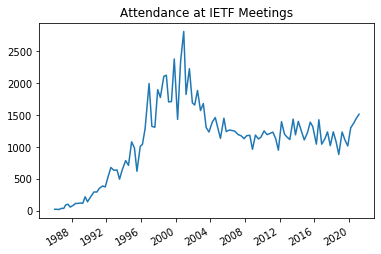

In [149]:
axes = meetings_df.plot(
    x='date',
    y='attendees',
    kind='line',
    legend=False,
    title='Attendance at IETF Meetings')
axes.set_xlabel('')
plt.show()

Do the recent virtual meetings especially stand out?

In [150]:
meetings_df['virtual'] = meetings_df.apply(lambda row: 'virtual' if row['city'] in ['Online', 'Virtual'] else 'inperson', axis=1)

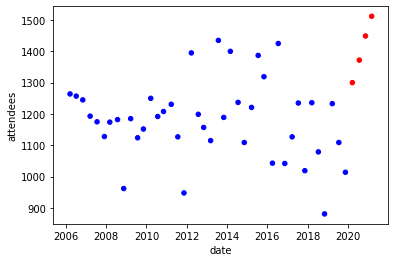

In [151]:
df = meetings_df[meetings_df['date'] > datetime(2006,1,1,0,0)]
df.plot.scatter(x='date',
       y='attendees',
       c=df['virtual'].map({'virtual':'red', 'inperson':'blue'})
)

Do the country or affiliation of participants differ for the recent virtual meetings? (Or on where the meeting is physically located?)

This will construct a dataframe of every attendee's registration at every specified meeting. (Downloading this data takes a while!)

In [152]:
meeting_attendees_df = pd.DataFrame()
for meeting in ietf_meetings:
    if meeting['num'] in [104,105,106,107,108,109]: # can filter here by the meetings to analyze
        registrations = dt.meeting_registrations(meeting=meeting['meeting_obj'])
        df = pd.DataFrame.from_records([dataclasses.asdict(x) for x in list(registrations)])
        df['num'] = meeting['num']
        meeting_attendees_df = meeting_attendees_df.append(df)

Filter by those who actually attended the meeting (checked in, didn't just register).

In [153]:
meeting_attendees_df[meeting_attendees_df['attended'] == True]

,resource_uri,affiliation,attended,country_code,email,first_name,id,last_name,meeting,person,reg_type,ticket_type,num
0,{'uri': '/api/v1/stats/meetingregistration/448...,Episteme Technology Consulting LLC,True,US,resnick@episteme.net,Pete,44859,Resnick,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...","{'uri': '/api/v1/person/person/18321/', 'param...",remote,full_week_pass,109
1,{'uri': '/api/v1/stats/meetingregistration/448...,Keio University / WIDE Project,True,JP,kato@wide.ad.jp,Akira,44860,Kato,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...","{'uri': '/api/v1/person/person/108587/', 'para...",remote,full_week_pass,109
2,{'uri': '/api/v1/stats/meetingregistration/448...,Facebook,True,US,woo@fb.com,Guowu,44861,Xie,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...","{'uri': '/api/v1/person/person/107868/', 'para...",remote,full_week_pass,109
3,{'uri': '/api/v1/stats/meetingregistration/448...,AMS,True,US,jbui@amsl.com,Jenny,44862,Bui,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...","{'uri': '/api/v1/person/person/124319/', 'para...",remote,full_week_pass,109
4,{'uri': '/api/v1/stats/meetingregistration/448...,Port 9 Labs,True,US,mc@port9labs.com,Mike,44863,Coleman,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...","{'uri': '/api/v1/person/person/127095/', 'para...",remote,full_week_pass,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,{'uri': '/api/v1/stats/meetingregistration/400...,Meetecho/University of Napoli,True,IT,spromano@unina.it,Simon Pietro,40054,Romano,"{'uri': '/api/v1/meeting/meeting/866/', 'param...","{'uri': '/api/v1/person/person/108722/', 'para...",,,104
1229,{'uri': '/api/v1/stats/meetingregistration/400...,Internet Society,True,US,polk@isoc.org,Ryan,40055,Polk,"{'uri': '/api/v1/meeting/meeting/866/', 'param...","{'uri': '/api/v1/person/person/125944/', 'para...",,,104
1230,{'uri': '/api/v1/stats/meetingregistration/400...,eLance journalist,True,DE,monika@ermert.de,Monika,40056,Ermert,"{'uri': '/api/v1/meeting/meeting/866/', 'param...","{'uri': '/api/v1/person/person/123854/', 'para...",,,104
1231,{'uri': '/api/v1/stats/meetingregistration/400...,,True,SE,henrik@levkowetz.com,Henrik,40057,Levkowetz,"{'uri': '/api/v1/meeting/meeting/866/', 'param...","{'uri': '/api/v1/person/person/105730/', 'para...",,,104


In [154]:
grouped = meeting_attendees_df[meeting_attendees_df['attended'] == True].groupby(['num','country_code'])

In [155]:
country_ordering=grouped.size().unstack().sum(0).sort_values(ascending=False).index.values

In [156]:
reordered = grouped.size().unstack().reindex(columns=country_ordering)

In [157]:
virtual_nums = list(meetings_df[meetings_df['virtual']=='virtual']['num'])

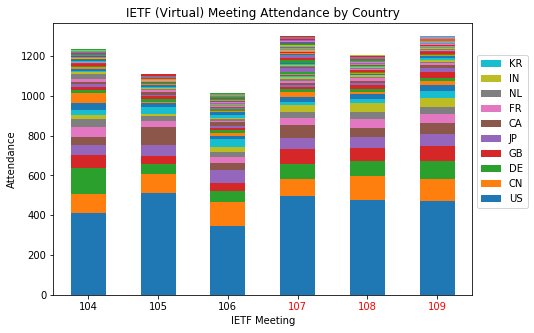

In [159]:
fig, ax = plt.subplots(figsize=(7.5,5))
reordered.plot( 
    kind='bar',
    stacked=True,
    legend=False,
    ax = ax
)
ahandles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(ahandles[:10]), reversed(labels[:10]), bbox_to_anchor=(1, 0.9))
ax.set_xlabel('IETF Meeting')
plt.xticks(rotation=0)
[t.set_color('red') for t in ax.xaxis.get_ticklabels() if int(t.get_text()) in virtual_nums]
ax.set_ylabel('Attendance')
ax.set_title('IETF (Virtual) Meeting Attendance by Country')
plt.show()

In [160]:
fig.savefig('graphs/attendance-by-country-virtual.png',dpi=300, bbox_inches='tight')

The virtual meetings have modestly higher attendance than recent meetings. The proportions by country are not obviously different in the virtual meetings, but there may be less variation of the proportion of attendance based on where the meeting is physically located. (That is, so far we don't see the big swings in US, Chinese, Japanese or German attendance, as we did when the meeting was physically located in the US, China, Japan or Europe.)

### Grouping by continent or region

The UN Statistical Commission provides [list of countries including country codes and grouped into regions and subregions](https://unstats.un.org/unsd/methodology/m49/). (I converted to XLS as the CSV version didn't correctly escape commas in certain regional names.)

In [161]:
undf = pd.read_excel('unsd.xls')

In [162]:
undf

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN,Developing
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x,Developing
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN,Developing
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x,Developing
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x,Developing


In [163]:
attended = meeting_attendees_df[meeting_attendees_df['attended'] == True]

In [164]:
attended_regions = attended.merge(undf, how='left', left_on='country_code', right_on='ISO-alpha2 Code')

Map to North America and South America (to match IETF's practice and some common convention, even though the UN prefers Northern America and Latin America).

In [166]:
def preferred_region_names(series):
    if series['Sub-region Name'] == 'Northern America':
        return 'North America'
    if series['Intermediate Region Name'] in ['Caribbean', 'Central America']:
        return 'North America'
    if series['Intermediate Region Name'] == 'South America':
        return 'South America'
    else:
        return series['Region Name']

In [167]:
attended_regions['region'] = attended_regions.apply(preferred_region_names, axis=1)

In [168]:
grouped = attended_regions.groupby(['num','region'])

In [169]:
region_ordering=grouped.size().unstack().sum(0).sort_values(ascending=False).index.values

In [170]:
reordered = grouped.size().unstack().reindex(columns=region_ordering)

In [171]:
reordered

region,North America,Europe,Asia,Africa,South America,Oceania
num,,,,,,
104,455,517,214,15,15,14
105,609,247,208,6,18,17
106,381,274,300,13,12,24
107,581,347,264,48,23,15
108,529,363,254,25,19,11
109,530,413,296,20,20,18


In [172]:
proportions = reordered.apply(lambda x: x*100/sum(x), axis=1)

In [173]:
proportions

region,North America,Europe,Asia,Africa,South America,Oceania
num,,,,,,
104,36.991870,42.032520,17.398374,1.219512,1.219512,1.138211
105,55.113122,22.352941,18.823529,0.542986,1.628959,1.538462
106,37.948207,27.290837,29.880478,1.294821,1.195219,2.390438
107,45.461659,27.151800,20.657277,3.755869,1.799687,1.173709
108,44.046628,30.224813,21.149042,2.081599,1.582015,0.915903
109,40.863531,31.842714,22.821897,1.542020,1.542020,1.387818


In [174]:
reordered_meetings = reordered.merge(meetings_df, how='left', on='num')

In [175]:
def preferred_city_names(city):
    if city in ['Virtual','Online']:
        return 'Virtual'
    if city == 'Montreal':
        return 'Montréal'
    return city

In [176]:
reordered_meetings['city'] = reordered_meetings['city'].transform(preferred_city_names)

In [177]:
combined_labels = reordered_meetings.apply(lambda x: str(x['num']) + '\n' + x['city'], axis=1)

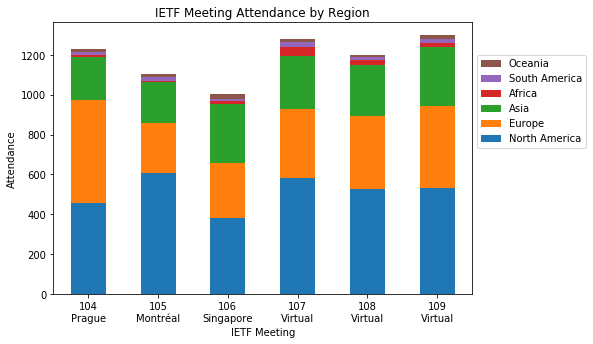

In [178]:
fig2, ax2 = plt.subplots(figsize=(7.5,5))
reordered.plot( 
    kind='bar',
    stacked=True,
    legend=False,
    ax = ax2
)
ahandles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(ahandles[:10]), reversed(labels[:10]), bbox_to_anchor=(1, 0.9))
ax2.set_xlabel('IETF Meeting')
plt.xticks(rotation=0)
ax2.set_xticklabels(combined_labels)
ax2.set_ylabel('Attendance')
ax2.set_title('IETF Meeting Attendance by Region')
plt.show()

In [179]:
fig2.savefig('graphs/attendance-by-region.png',dpi=300, bbox_inches='tight')

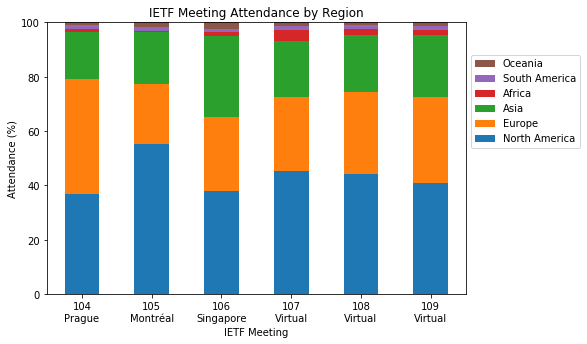

In [180]:
fig2, ax2 = plt.subplots(figsize=(7.5,5))
proportions.plot( 
    kind='bar',
    stacked=True,
    legend=False,
    ax = ax2
)
ahandles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(ahandles[:10]), reversed(labels[:10]), bbox_to_anchor=(1, 0.9))
ax2.set_xlabel('IETF Meeting')
plt.xticks(rotation=0)
ax2.set_xticklabels(combined_labels)
ax2.set_ylabel('Attendance (%)')
ax2.set_ylim((0,100))
ax2.set_title('IETF Meeting Attendance by Region')
plt.show()

In [181]:
fig2.savefig('graphs/attendance-by-region-proportion.png',dpi=300, bbox_inches='tight')

### Affiliation

We can also visualize the stated affiliations of the attendees, although the number of affiliations is much more diverse and messier than the country data.

In [182]:
aff_grouped = meeting_attendees_df.groupby(['num','affiliation'])
aff_grouped.size()

num  affiliation            
104                             185
     128 Technology               1
     ACKLIO                       1
     ACLU                         1
     ADVA Optical Networking      1
                               ... 
109  vanderstok consultancy       1
     webcomposite s.r.o.          1
     windows                      1
     www Safegnamain. com         1
     www.hlaingthein87.com        1
Length: 3600, dtype: int64

In [183]:
size_sorted = aff_grouped.size().sort_values(ascending=False).sort_index(level='num', sort_remaining=False)

In [184]:
size_sorted.reset_index().groupby('num').head()

,num,affiliation,0
0,104,,185
1,104,Huawei,31
2,104,Cisco,30
3,104,Google,26
4,104,Cisco Systems,26
579,105,,142
580,105,Google,33
581,105,Juniper Networks,28
582,105,Cisco Systems,28
583,105,Cisco,23


In [185]:
aff_ordering=aff_grouped.size().unstack().sum(0).sort_values(ascending=False).index.values

In [186]:
aff_reordered = aff_grouped.size().unstack().reindex(columns=aff_ordering)

In [187]:
aff_ordering[1:50]

array(['Cisco', 'Google', 'Huawei', 'Cisco Systems', 'Ericsson',
       'Juniper Networks', 'Nokia', 'Internet Society', 'RIPE NCC',
       'Microsoft', 'Akamai Technologies', 'Huawei Technologies',
       'Verisign', 'ETRI', 'NIST', 'Apple', 'Facebook', 'AMS', 'Ciena',
       'Futurewei', 'ICANN', 'Cloudflare', 'Deutsche Telekom', 'Fastly',
       'Mozilla', 'Salesforce', 'Orange', 'ISC', 'NTT', 'BT',
       'China Mobile', 'Huawei Technologies Co., Ltd.', 'China Telecom',
       'NLnet Labs', 'CAICT', 'APNIC', 'Tsinghua University', 'Inria',
       'AT&T', 'Oracle', 'Akamai', 'Intel', 'HUAWEI', 'JPRS', 'LACNIC',
       'None', 'Verizon', 'InterDigital', 'Meetecho'], dtype=object)

In [188]:
aff_reordered = aff_grouped.size().unstack().reindex(columns=aff_ordering[1:20])

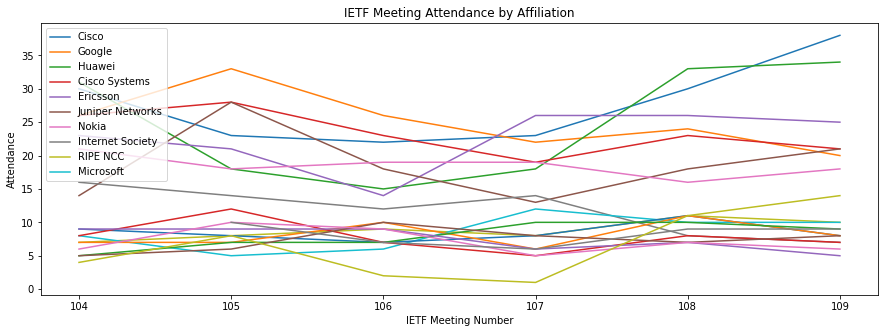

In [192]:
fig, ax = plt.subplots(figsize=(15,5))
aff_reordered.plot(
    kind='line',
    legend=False,
    ax = ax
)
ahandles, labels = ax.get_legend_handles_labels()
ax.legend(ahandles[:10], labels[:10], loc='upper left')
ax.set_xlabel('IETF Meeting Number')
ax.set_ylabel('Attendance')
ax.set_title('IETF Meeting Attendance by Affiliation')
plt.show()

These attendance numbers by large companies are significant, but recall that the average meeting has over 1000 participants, so this excludes the vast majority of participants, and unaffiliated participants are always the largest single group (not shown in this graph).

<div class="alert alert-info"><b>TODO</b>
Some entity resolution to handle duplicates is necessary to make this chart actually useful (for both Cisco and Huawei, in particular, but it applies to many affiliations).</div>

In [193]:
fig.savefig('graphs/attendance-by-affiliation.png',dpi=300)